# Nested versus non-nested cross-validation

Tutorial from the sklearn documention. 

For further info, see https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

Number of random trials

In [4]:
NUM_TRIALS = 30

Load the dataset

In [5]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

Set up possible values of parameters to optimize over

In [6]:
p_grid = {"C": [1, 10, 100],
         "gamma": [.01, .1]}

We will use a Support Vector Classifier with "rbf" kernel

In [7]:
svm = SVC(kernel="rbf")

Arrays to store scores

In [8]:
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

Loop for each trial

In [ ]:
for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    
    # Non-nested to train different models and tune the hyperparameters
    model = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, iid=False)
    model.fit(X_iris, y_iris)
    non_nested_scores[i] = model.best_score_
    
    # Nested CV to evaluate the model with the hyperparameters choosen
    nested_score = cross_val_score(model, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    
score_difference = non_nested_scores - nested_scores

Plot scores on each trial for nested and non-nested CV

Text(0.5, 1.0, 'Non-Nested and Nested Cross Validation on Iris Dataset')

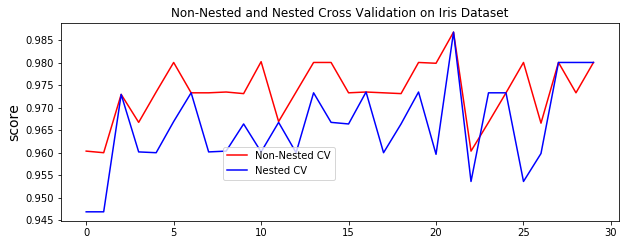

In [32]:
plt.figure(figsize=(10,8))
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_scores_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_scores_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset");

Plot bar chart of the difference

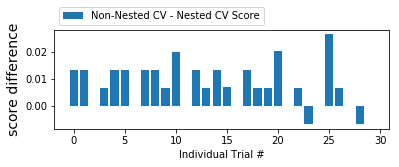

In [36]:
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0));
plt.ylabel("score difference", fontsize="14");